In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# import MisrToolkit as mtk # needs python3.6
# from mpl_toolkits.basemap import Basemap # needs python 3.8?
import sys # to check python version
import os
import glob
import datetime as dt

In [2]:
# roughness_dir = "/Volumes/SEAGATE/roughness_apr2016_from_PH/roughness_predicted"
roughness_dir = "/media/ehsan/6T_part1/2016/april_2016/14528_apr2016/project_april_2016_3cam/roughness_predicted_from_PH"

In [3]:
os.path.isdir(roughness_dir)

True

In [4]:
# path to training dataset

trainingDS_dir = "/media/ehsan/6T_part1/2016/april_2016/14528_apr2016/project_april_2016_3cam/training_data/april_2016/"

trainingDS_csv = "insample_20apr_out9cam3bands_ILATM2_20160420_204606.csv"
# trainingDS_csv = "insample_29apr_lon230_231_oldMethod_MisrAtmCalibratedModel_april_2016_training_dataset_datetime.csv"


In [5]:
# open/read input dataset

atm_trainigDS_fp = os.path.join(trainingDS_dir, trainingDS_csv)
atm_transect = pd.read_csv(atm_trainigDS_fp)

In [6]:
atm_transect.shape

(6419, 23)

In [7]:
# select a smaller subset of transect, like the first 1000 points (or 10)

max_step = 100

atm_transect_small = atm_transect.iloc[0:max_step]

In [8]:
atm_transect_small.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          100 non-null    int64  
 1   path                100 non-null    int64  
 2   orbit               100 non-null    int64  
 3   block               100 non-null    int64  
 4   line                100 non-null    int64  
 5   sample              100 non-null    int64  
 6   lat                 100 non-null    float64
 7   lon                 100 non-null    float64
 8   Da_r                100 non-null    float64
 9   Ca_r                100 non-null    float64
 10  Ba_r                100 non-null    float64
 11  Aa_r                100 non-null    float64
 12  An_r                100 non-null    float64
 13  An_g                100 non-null    float64
 14  An_b                100 non-null    float64
 15  An_nir              100 non-null    float64
 16  Af_r     

## find roughess.dat files

In [9]:
misr_roughness_in_pixel_list = []


for irow in range(atm_transect_small.shape[0]):


#     path = atm_transect_small['#path'].iloc[irow]
#     orbit = atm_transect_small[' orbit'].iloc[irow]
#     block = atm_transect_small[' img_block'].iloc[irow]
#     line = atm_transect_small[' line'].iloc[irow]
#     sample = atm_transect_small[' sample'].iloc[irow]
    
    path = atm_transect_small['path'].iloc[irow]
    orbit = atm_transect_small['orbit'].iloc[irow]
    block = atm_transect_small['block'].iloc[irow]
    line = atm_transect_small['line'].iloc[irow]
    sample = atm_transect_small['sample'].iloc[irow]


    # zfill() path and string it
    if path < 100:
        path_str = str(path).zfill(3)
    else:
        path_str = str(path)


    # zfill() block and string it
    if block < 10:
        block_str = str(block).zfill(2)
    else:
        block_str = str(block)


    roughness_file_pattern = "roughness_toa_refl_P"+path_str+"_O0"+str(orbit)+"_B0"+block_str+".dat"
    print(roughness_file_pattern)

    # find roughness file
    rough_file_list = glob.glob(os.path.join(roughness_dir, roughness_file_pattern))

    if (len(rough_file_list) < 1):
        raise ValueError("roughness list came out empty!")

    if (len(rough_file_list) > 1):
        raise ValueError("roughness list has more that 1 file! there should be an error in our logic!")


    # find roughness and open it and change binary to array
    rough_2d_arr = np.fromfile(rough_file_list[0], dtype=np.double)[0:1048576].reshape((512,-1))
#     print(rough_2d_arr.shape)
    roughness_in_pixel = rough_2d_arr[int(line), int(sample)]
    
    if roughness_in_pixel > 1:
        misr_roughness_in_pixel_list.append(roughness_in_pixel)
    else:
        raise ValueError("why MISR roughness is negative for an ATM location? model error? or something else?")

        
print("\ntotal MISR roughness files: %s" %len(misr_roughness_in_pixel_list))

roughness_toa_refl_P161_O086908_B006.dat
roughness_toa_refl_P161_O086908_B006.dat
roughness_toa_refl_P161_O086908_B006.dat
roughness_toa_refl_P161_O086908_B006.dat
roughness_toa_refl_P161_O086908_B006.dat
roughness_toa_refl_P161_O086908_B006.dat
roughness_toa_refl_P161_O086908_B006.dat
roughness_toa_refl_P161_O086908_B006.dat
roughness_toa_refl_P161_O086908_B006.dat
roughness_toa_refl_P161_O086908_B006.dat
roughness_toa_refl_P161_O086908_B006.dat
roughness_toa_refl_P161_O086908_B006.dat
roughness_toa_refl_P161_O086908_B006.dat
roughness_toa_refl_P161_O086908_B006.dat
roughness_toa_refl_P161_O086908_B006.dat
roughness_toa_refl_P161_O086908_B006.dat
roughness_toa_refl_P161_O086908_B006.dat
roughness_toa_refl_P161_O086908_B006.dat
roughness_toa_refl_P161_O086908_B006.dat
roughness_toa_refl_P161_O086908_B006.dat
roughness_toa_refl_P161_O086908_B006.dat
roughness_toa_refl_P161_O086908_B006.dat
roughness_toa_refl_P161_O086908_B006.dat
roughness_toa_refl_P161_O086908_B006.dat
roughness_toa_re

In [10]:
# roughness_in_pixel_list

## plot transect

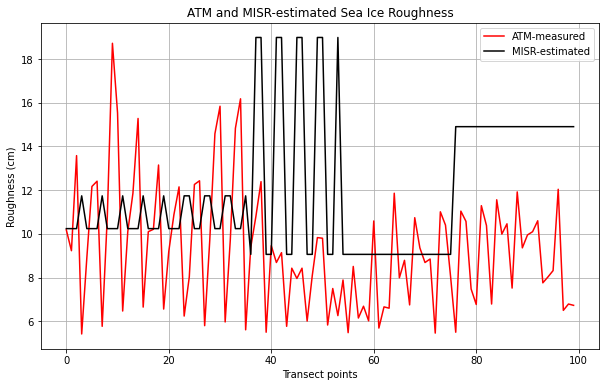

In [11]:
x= range(len(misr_roughness_in_pixel_list))

fig, ax = plt.subplots(figsize=(10, 6))

# Specify how our lines should look
# ax.plot(x, atm_transect_small['rms'], color='red', label='ATM-measured')
ax.plot(x, atm_transect_small['mean_ATM_roughness'], color='red', label='ATM-measured')
ax.plot(x, misr_roughness_in_pixel_list, color='black', label='MISR-estimated')

# Same as above
ax.set_xlabel('Transect points')
ax.set_ylabel('Roughness (cm)')
ax.set_title('ATM and MISR-estimated Sea Ice Roughness')
ax.grid(True)
ax.legend(loc='upper right');

## plot histogram

## statistics